## Logistic Regression
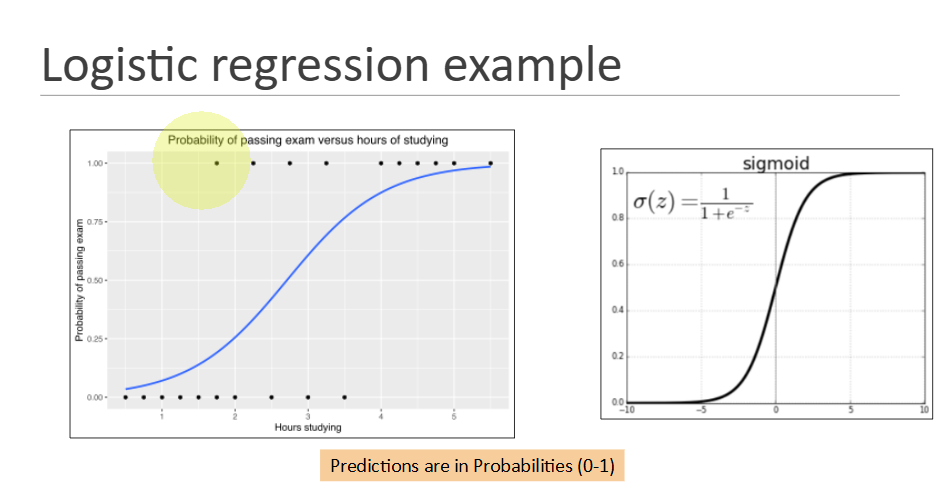

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

## Load the data

In [2]:
import pandas as pd

In [3]:
path = r"C:\Users\admin\Documents\Sindhura\LMS Basic Python and DA\datasets\Iris.csv"
df = pd.read_csv(path)
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [7]:
## check missing values
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
df.duplicated().sum()

0

## Separate X and Y features

In [9]:
X = df.drop(columns=["Id","Species"])
Y = df[["Species"]]

In [10]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
Y.head()

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


## Data Preprocessing and Data cleaning

In [12]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [16]:
num_pipe = make_pipeline(
    (SimpleImputer(strategy="median")),
    (StandardScaler())
).set_output(transform='pandas')

In [18]:
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [17]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


## Train and Test split

In [19]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X_pre,Y,train_size=0.8,test_size=0.2,random_state=21)

In [20]:
xtrain.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
41,-1.627688,-1.744778,-1.398138,-1.181504
131,2.492019,1.726266,1.502013,1.053537
70,0.068662,0.337848,0.592162,0.790591
46,-0.900681,1.726266,-1.227541,-1.312977
126,0.432165,-0.587764,0.592162,0.790591


In [21]:
xtest.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
92,-0.052506,-1.050569,0.137236,0.001753
44,-0.900681,1.726266,-1.056944,-1.050031
7,-1.021849,0.800654,-1.284407,-1.312977
21,-0.900681,1.494863,-1.284407,-1.050031
95,-0.173674,-0.124958,0.250967,0.001753


In [22]:
ytrain.head()

,Species
41,Iris-setosa
131,Iris-virginica
70,Iris-versicolor
46,Iris-setosa
126,Iris-virginica


In [23]:
ytest.head()

,Species
92,Iris-versicolor
44,Iris-setosa
7,Iris-setosa
21,Iris-setosa
95,Iris-versicolor


## Model Building

In [24]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(xtrain,ytrain)

LogisticRegression()

In [25]:
model.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [26]:
model.intercept_

array([-0.2087594 ,  1.97381737, -1.76505797])

In [27]:
model.coef_

array([[-1.02546396,  1.08670848, -1.81709084, -1.75915848],
       [ 0.47745412, -0.28614476, -0.4123607 , -0.6481049 ],
       [ 0.54800984, -0.80056371,  2.22945155,  2.40726338]])

## Model Evaluation

In [28]:
model.score(xtrain,ytrain)

0.975

In [29]:
model.score(xtest,ytest)

0.9333333333333333

In [30]:
ypred = model.predict(xtest)
ypred[:5]

array(['Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor'], dtype=object)

In [31]:
ytest.head()

,Species
92,Iris-versicolor
44,Iris-setosa
7,Iris-setosa
21,Iris-setosa
95,Iris-versicolor


In [32]:
yprob_test = model.predict_proba(xtest)
yprob_test[:5]

array([[2.19290366e-02, 9.23786332e-01, 5.42846314e-02],
       [9.85113791e-01, 1.48858706e-02, 3.38660261e-07],
       [9.76232526e-01, 2.37672618e-02, 2.11915260e-07],
       [9.85140900e-01, 1.48588914e-02, 2.08785497e-07],
       [7.61872768e-02, 8.80765102e-01, 4.30476214e-02]])

In [34]:
model.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [33]:
yprob_test[0]

array([0.02192904, 0.92378633, 0.05428463])

In [35]:
ypred[0]

'Iris-versicolor'

## Confusion Matrix

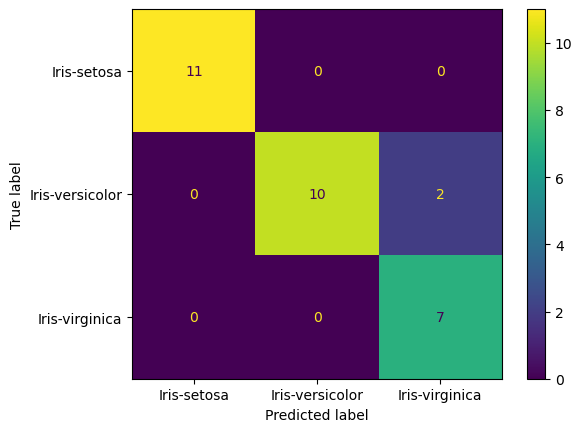

In [36]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model,xtest,ytest)


In [37]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.83      0.91        12
 Iris-virginica       0.78      1.00      0.88         7

       accuracy                           0.93        30
      macro avg       0.93      0.94      0.93        30
   weighted avg       0.95      0.93      0.93        30



In [38]:
from sklearn.metrics import f1_score
f1_score(ytest,ypred,average='macro')

0.9280303030303031

In [39]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,xtrain,ytrain,cv=3,scoring="f1_macro")
scores

array([0.95054945, 1.        , 0.97530864])

In [40]:
scores.mean()

0.9752860308415864

## From the above model, we can observe that the accuracy and f1 scores are more than 0.80 , we can consider this model for final model predictions